In [57]:
from pathlib import Path
import os

# Establece la raíz del proyecto manualmente
project_root = Path("F:/JCMDataCenter/Cursos/Evolve Academy/Data Scientist IA/Futpeak") # sobremesa
#project_root = Path("C:/Users/juanm/Desktop/FUTPEAK/Futpeak") # portátil

# Cambia el directorio de trabajo actual a esa raíz
os.chdir(project_root)

print("📁 Directorio de trabajo actual:", Path.cwd())

📁 Directorio de trabajo actual: F:\JCMDataCenter\Cursos\Evolve Academy\Data Scientist IA\Futpeak


In [58]:
# FUTPEAK — MVP Notebook para Predicción de Evolución de Jugadores
# Etapa 1: Carga y revisión inicial de los datos

# ----------------------------------------------
# 👨‍🏫 Introducción:
# En esta primera etapa vamos a cargar los datos y entender qué columnas tenemos,
# cuál es su estructura y cómo nos pueden servir para modelar la evolución de un jugador.
# ----------------------------------------------

import pandas as pd
from pathlib import Path

# Ruta del proyecto (ajusta si estás en otro equipo)
project_root = Path("data/processed")

# Cargar los dos datasets principales
matchlogs_path = project_root / "cleaned_matchlogs.csv"
metadata_path = project_root / "cleaned_metadata.csv"

# Leemos los CSV
matchlogs = pd.read_csv(matchlogs_path)
metadata = pd.read_csv(metadata_path)

# ----------------------------------------------
# 🔍 Revisión rápida de las estructuras
# ----------------------------------------------

print("\n📄 Matchlogs (por partido):")
print(matchlogs.shape)
print(matchlogs.columns.tolist())
print(matchlogs.head(2))

print("\n👤 Metadata (por jugador):")
print(metadata.shape)
print(metadata.columns.tolist())
print(metadata.head(2))

# ----------------------------------------------
# 📌 Qué queremos revisar en esta etapa:
# - ¿Qué columnas son numéricas y están completas?
# - ¿Cómo se codifican las posiciones?
# - ¿Hay duplicados o errores evidentes?
# - ¿Podemos unir ambos datasets por Player_ID sin problema?
# ----------------------------------------------

# Verificar si hay duplicados
print("\n🔎 Duplicados en Player_ID:", metadata['Player_ID'].duplicated().sum())

# Revisar columnas clave con nulos en matchlogs
print("\n🧼 Nulos por columna (matchlogs):")
print(matchlogs.isnull().sum().sort_values(ascending=False))

# Revisar columnas clave con nulos en metadata
print("\n🧼 Nulos por columna (metadata):")
print(metadata.isnull().sum().sort_values(ascending=False))

# ----------------------------------------------
# ✅ Resultado esperado de esta etapa:
# - Confirmar que los archivos se cargan bien
# - Saber qué columnas numéricas están listas para usar (goles, asistencias, minutos, etc.)
# - Detectar columnas que necesitamos rellenar con 0 (como goles, tarjetas, tiros...)
# - Tener claro que podemos unir los datos sin conflicto
# ----------------------------------------------


📄 Matchlogs (por partido):
(478250, 46)
['Player_name', 'Player_ID', 'Seasons', 'Date', 'Day', 'Competition', 'Round', 'Home_Away', 'Result', 'Player_team', 'Rival_team', 'Start', 'Position', 'Minutes', 'Goals', 'Assists', 'Penalty_kick', 'Penalty_kick_att', 'Shots', 'Shots_on_target', 'Yellow_cards', 'Red_cards', 'Fouls_committed', 'Fouls_drawn', 'Offsides', 'Crosses', 'Tackles_won', 'Interceptions', 'Own_goals', 'Penaltys_won', 'Penaltys_conceded', 'Touches', 'Tackles', 'Blocks', 'xG', 'non_penalty_xG', 'x_assisted_G', 'Shot_creating_actions', 'Goal_creating_actions', 'Passes_completed', 'Passes_att', 'Percent_passes', 'Progressive_passes', 'Feet_control', 'Progressive_control', 'Dribling_suc']
        Player_name Player_ID Seasons        Date  Day  Competition  \
0  Luciano Abecasis  6c510f2d    2016  2016-02-05  Fri  Primera Div   
1  Luciano Abecasis  6c510f2d    2016  2016-02-12  Fri  Primera Div   

         Round Home_Away Result Player_team  ... x_assisted_G  \
0  Matchweek 1

In [59]:
# Conocer número total de jugadores 
total_unique_players = matchlogs['Player_ID'].nunique()
print("Total number of unique players:", total_unique_players)


Total number of unique players: 2809


In [60]:
import re

# Usamos límites de palabra (\b) o delimitadores de posición como - o inicio/final
pattern = r'(^|[-])(?:CF|ST|FW|LW|RW|WF|IF|F)($|[-])'

df_attack = metadata['Position'].str.contains(pattern, na=False)
df_attack.sum()


metadata[df_attack]



C:\Users\juanm\AppData\Local\Temp\ipykernel_25148\2833990896.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_attack = metadata['Position'].str.contains(pattern, na=False)


,Player_ID,Player_name,Full_name,Url_template,Birth_date,Age,Position,Footed,Birth_place,Nationality,Club,Gender
1,db5ee72d,Ramon Abila,Ramón Darío Ábila,https://fbref.com/en/players/db5ee72d/Ramon-Abila,1989-10-14,35-198,FW,Right,"Córdoba, Argentina",Argentina,Huracán,male
6,363ba6d7,Luciano Acosta,Luciano Federico Acosta,https://fbref.com/en/players/363ba6d7/Luciano-...,1994-05-31,30-334,AM-FC-FW-MF,Right,"Rosario, Argentina",Argentina,FC Dallas,male
8,15741f49,Walter Acuna,NaN,https://fbref.com/en/players/15741f49/Walter-A...,1992-03-04,NaN,FW,NaN,NaN,Argentina,NaN,unknown
14,d9ebfcfa,Gabriel Alanis,NaN,https://fbref.com/en/players/d9ebfcfa/Gabriel-...,1994-03-16,31-045,AM-DF-FW-MF-WM,Left,"Córdoba, Argentina",Argentina,Huracán,male
16,834d0be5,Lucas Alario,Lucas Nicolás Alario,https://fbref.com/en/players/834d0be5/Lucas-Al...,1992-10-08,32-204,FW-LP,Right,"Tostado, Argentina",Argentina,Estudiantes (LP),male
...,...,...,...,...,...,...,...,...,...,...,...,...
3972,e4738e91,Dyego Sousa,Dyego Wilverson Ferreira Sousa,https://fbref.com/en/players/e4738e91/Dyego-Sousa,1989-09-14,35-229,FW,Right,NaN,Portugal,Nacional,male
3973,cb48b0d0,Erico Sousa,NaN,https://fbref.com/en/players/cb48b0d0/Erico-Sousa,1995-03-12,30-050,FW-MF,NaN,"Portugal, Portugal",Portugal,Boreham Wood,male
3976,fb1d9d82,Toze,António José Pinheiro Carvalho,https://fbref.com/en/players/fb1d9d82/Toze,1993-01-14,32-107,AM-FW-MF-SC,Right,"Forjães, Portugal",Portugal,Al-Riyadh SC,male
3979,4f182a8f,Xadas,Tianjin Jinmen Tiger,https://fbref.com/en/players/4f182a8f/Xadas,1997-12-02,27-150,AM-FW-MF,Left,"Ul, Portugal",Portugal,NaN,male


In [61]:
# ----------------------------------------------
# Etapa 2: Unión, cálculo de edad y filtrado por perfil ofensivo (con regex personalizado)
# ----------------------------------------------

import pandas as pd
import re

# Definir los grupos de posiciones (puede seguir siendo útil para otras tareas)
POSITION_GROUPS = {
    'GOALKEEPER': ['GK'],
    'DEFENSIVE': ['CB', 'LB', 'RB', 'FB', 'LWB', 'RWB', 'SW', 'D'],
    'MIDFIELD': ['CM', 'DM', 'MF', 'AM'],
    'ATTACKING': ['CF', 'ST', 'F', 'FW', 'LW', 'RW', 'WF', 'IF', 'OL', 'OR']
}

# ----------------------------------------------
# 1. Detectar jugadores atacantes mediante regex sobre metadata
# ----------------------------------------------
pattern = r'(^|-)(?:CF|ST|FW|LW|RW|WF|IF|F|OL|OR)($|-)'
df_attack_mask = metadata['Position'].str.contains(pattern, na=False, regex=True)
df_attack = metadata[df_attack_mask].copy()

# Solo jugadores masculinos
df_attack = df_attack[df_attack['Gender'] == 'male']

# Asignamos grupo de posición (opcional, útil para ver distribución)
def assign_position_group(position):
    for group, positions in POSITION_GROUPS.items():
        if any(pos in position for pos in positions):
            return group
    return 'UNKNOWN'

df_attack['Position_Group'] = df_attack['Position'].apply(assign_position_group)

# Verificación
print(f"\n✅ Jugadores ofensivos detectados por regex: {df_attack['Player_ID'].nunique()}")

# ----------------------------------------------
# 2. Unir matchlogs con metadata filtrada (solo atacantes)
# ----------------------------------------------
df = matchlogs.merge(
    df_attack[['Player_ID', 'Position', 'Birth_date', 'Position_Group']],
    on='Player_ID', how='inner'  # Solo jugadores ofensivos
)

print(f"🧠 Total de filas (partidos) de jugadores ofensivos: {df.shape[0]}")
print(f"🧠 Jugadores ofensivos únicos en df final: {df['Player_ID'].nunique()}")

# ----------------------------------------------
# Después del merge, aseguramos que 'Position' sea la correcta
# Si aparecen Position_x y Position_y, nos quedamos con la del metadata (Position_y)
if 'Position_x' in df.columns and 'Position_y' in df.columns:
    df['Position'] = df['Position_y']
    df = df.drop(columns=['Position_x', 'Position_y'])  # limpiamos duplicadas


# ----------------------------------------------
# 3. Cálculo de edad en cada partido
# ----------------------------------------------
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Birth_date'] = pd.to_datetime(df['Birth_date'], errors='coerce')

df['Age'] = (df['Date'] - df['Birth_date']).dt.days / 365.25

# Verificamos algunos valores
print("\n🧾 Ejemplo de fechas y edad calculada:")
print(df[['Player_ID', 'Date', 'Birth_date', 'Age']].head())

# ----------------------------------------------
# 4. Nulos por columna y su porcentaje
# ----------------------------------------------
nulls = df.isnull().sum()
null_pct = (nulls / len(df)) * 100
null_info = pd.DataFrame({'Nulls': nulls, 'Percentage': null_pct})
print("\n🔎 Nulos por columna (top 10):")
print(null_info[null_info['Nulls'] > 0].sort_values(by='Percentage', ascending=False).head(10))

# ----------------------------------------------
# ✅ Resultado esperado:
# - Solo se han incluido los jugadores ofensivos definidos por tu patrón regex
# - Se ha unido correctamente con matchlogs
# - Edad por partido está calculada
# - Se revisan columnas con nulos para decidir qué usar en fórmula de rating
# ----------------------------------------------



✅ Jugadores ofensivos detectados por regex: 992
🧠 Total de filas (partidos) de jugadores ofensivos: 151074
🧠 Jugadores ofensivos únicos en df final: 715

🧾 Ejemplo de fechas y edad calculada:


C:\Users\juanm\AppData\Local\Temp\ipykernel_25148\1490155568.py:20: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_attack_mask = metadata['Position'].str.contains(pattern, na=False, regex=True)


  Player_ID       Date Birth_date        Age
0  db5ee72d 2024-02-11 1989-10-14  34.327173
1  db5ee72d 2024-02-14 1989-10-14  34.335387
2  db5ee72d 2024-02-24 1989-10-14  34.362765
3  db5ee72d 2024-02-29 1989-10-14  34.376454
4  db5ee72d 2024-03-05 1989-10-14  34.390144

🔎 Nulos por columna (top 10):
                    Nulls  Percentage
Penaltys_won       129692   85.846671
Penaltys_conceded  129692   85.846671
Tackles_won         99315   65.739307
Crosses             99314   65.738645
Offsides            99300   65.729378
Fouls_drawn         99285   65.719449
Fouls_committed     99285   65.719449
Percent_passes      94661   62.658697
Blocks              94106   62.291327
x_assisted_G        94106   62.291327


In [62]:
# Qué atacantes no tienen registros en matchlogs
missing_ids = set(df_attack['Player_ID']) - set(df['Player_ID'])
print(f"🔍 Jugadores ofensivos que no entraron al merge: {len(missing_ids)}")

# ¿Y cuántos tienen partidos en matchlogs?
missing_in_logs = matchlogs[matchlogs['Player_ID'].isin(missing_ids)]
print(f"📊 Jugadores con datos en matchlogs aunque no quedaron en df: {missing_in_logs['Player_ID'].nunique()}")


🔍 Jugadores ofensivos que no entraron al merge: 277
📊 Jugadores con datos en matchlogs aunque no quedaron en df: 0


In [63]:
# Número total de jugadores del df
df['Player_ID'].unique()
# Número total de jugadores del df
len(df['Player_ID'].unique())



715

In [64]:
unique_players = df[['Player_ID', 'Player_name']].drop_duplicates().sort_values('Player_name')
print(unique_players.to_string(index=False))


Player_ID                     Player_name
 14c2e443                    Aaron Nemane
 1fd66907                  Abdoul Diawara
 65585e3a                  Adama Diakhaby
 e90f5c7c                        Adaílton
 bda3c3a3                       Ademilson
 86bc2c16                  Adrian Dabasse
 7330f886                   Adrián Dalmau
 48ad8e8f                     Adrián León
 5788870f                     Agus Alonso
 a98f4de5                  Agustín Bouzat
 06424feb                  Agustín Coscia
 2ff09a27                Agustín Vuletich
 d67c87a4                    Aidan Barlow
 e3a5814e          Ainsley Maitland-Niles
 8159c16a                   Alain Oyarzun
 e0edd746                     Alan Massey
 8fe2101a                       Alan Ruiz
 afd24e42                   Alex Gilliead
 b3502edd                       Alex Reid
 0f4c0bad                   Alexis Alegue
 fa828ce6                   Alexis Canelo
 94e40a9f                   Alexis Castro
 741418c3           Alexis Claude-

In [65]:
print("Columnas en df:", df.columns.tolist())


Columnas en df: ['Player_name', 'Player_ID', 'Seasons', 'Date', 'Day', 'Competition', 'Round', 'Home_Away', 'Result', 'Player_team', 'Rival_team', 'Start', 'Minutes', 'Goals', 'Assists', 'Penalty_kick', 'Penalty_kick_att', 'Shots', 'Shots_on_target', 'Yellow_cards', 'Red_cards', 'Fouls_committed', 'Fouls_drawn', 'Offsides', 'Crosses', 'Tackles_won', 'Interceptions', 'Own_goals', 'Penaltys_won', 'Penaltys_conceded', 'Touches', 'Tackles', 'Blocks', 'xG', 'non_penalty_xG', 'x_assisted_G', 'Shot_creating_actions', 'Goal_creating_actions', 'Passes_completed', 'Passes_att', 'Percent_passes', 'Progressive_passes', 'Feet_control', 'Progressive_control', 'Dribling_suc', 'Birth_date', 'Position_Group', 'Position', 'Age']


In [66]:
# ----------------------------------------------
# Etapa 3: Cálculo del rating ofensivo por partido y agregación por temporada
# ----------------------------------------------

# Variables necesarias
rating_vars = ['Goals', 'Assists', 'Shots', 'Shots_on_target', 'Yellow_cards', 'Red_cards', 'Minutes']

# Rellenar nulos con 0 (solo esas columnas)
df[rating_vars] = df[rating_vars].fillna(0)

# Función de rating por partido normalizado a 90 minutos
def calculate_rating(row):
    score = (
        row['Goals'] * 5 +
        row['Assists'] * 4 +
        row['Shots_on_target'] * 0.5 +
        (row['Shots'] - row['Shots_on_target']) * 0.1 -
        row['Yellow_cards'] * 1 -
        row['Red_cards'] * 2
    )
    return score / (row['Minutes'] / 90) if row['Minutes'] > 0 else 0

# Aplicar cálculo
df['rating_per_90'] = df.apply(calculate_rating, axis=1)

# Verificar ejemplo de ratings calculados
print("\n📊 Ejemplo de ratings por partido:")
print(df[['Player_ID', 'Date', 'Minutes', 'Goals', 'Assists', 'rating_per_90']].head())

# ----------------------------------------------
# Agregar rating por temporada (año natural)
# ----------------------------------------------
df['Calendar_year'] = df['Date'].dt.year  # Puedes ajustar esto si tienes otro criterio de temporada

df_season = df.groupby(['Player_ID', 'Calendar_year']).agg({
    'Minutes': 'sum',
    'Goals': 'sum',
    'Assists': 'sum',
    'rating_per_90': 'mean',
    'Age': 'mean'
}).reset_index()

# Verificación de resultados agregados
print("\n📈 Evolución anual ejemplo:")
print(df_season[df_season['Player_ID'] == df_season['Player_ID'].iloc[0]])

# ----------------------------------------------
# ✅ Resultado esperado:
# - Columna `rating_per_90` por partido calculada
# - Evolución del jugador por temporada agregada en `df_season`
# ----------------------------------------------



📊 Ejemplo de ratings por partido:
  Player_ID       Date  Minutes  Goals  Assists  rating_per_90
0  db5ee72d 2024-02-11     34.0    0.0      0.0       0.529412
1  db5ee72d 2024-02-14     30.0    0.0      0.0       0.000000
2  db5ee72d 2024-02-24     24.0    0.0      0.0       0.000000
3  db5ee72d 2024-02-29     16.0    0.0      0.0       3.375000
4  db5ee72d 2024-03-05     19.0    0.0      0.0       0.000000

📈 Evolución anual ejemplo:
   Player_ID  Calendar_year  Minutes  Goals  Assists  rating_per_90        Age
0   0118dd71           2015    900.0    0.0      0.0       0.000000  23.235592
1   0118dd71           2016    270.0    0.0      0.0      -0.333333  24.077572
2   0118dd71           2017   1260.0    0.0      0.0      -0.071429  24.748020
3   0118dd71           2018    240.0    0.0      0.0       0.000000  26.175222
4   0118dd71           2019    630.0    0.0      0.0       0.000000  26.877481
5   0118dd71           2020    811.0    0.0      0.0      -0.100000  28.339220
6   01


📊 Evolución por temporada del jugador b19db005:
      Calendar_year  Minutes  Goals  Assists  rating_per_90        Age
4740           2015    395.0    2.0      2.0       4.805404  18.550308
4741           2016   3307.0   15.0     14.0       4.225413  19.174300
4742           2017   2207.0    6.0     12.0       3.353573  19.925082
4743           2018   2952.0   15.0     11.0       3.927845  21.153466
4744           2019   1538.0    5.0      3.0       4.370150  22.000614
4745           2020    625.0    5.0      2.0       5.577864  23.488233
4746           2021   2707.0    8.0      5.0       2.351857  23.962461
4747           2022   3262.0    7.0     20.0       3.789117  25.165756
4748           2023   2516.0    5.0      7.0       2.566020  26.210314
4749           2024   3589.0   14.0     13.0       3.731315  27.138817
4750           2025   1903.0   26.0      6.0       9.515772  27.812262


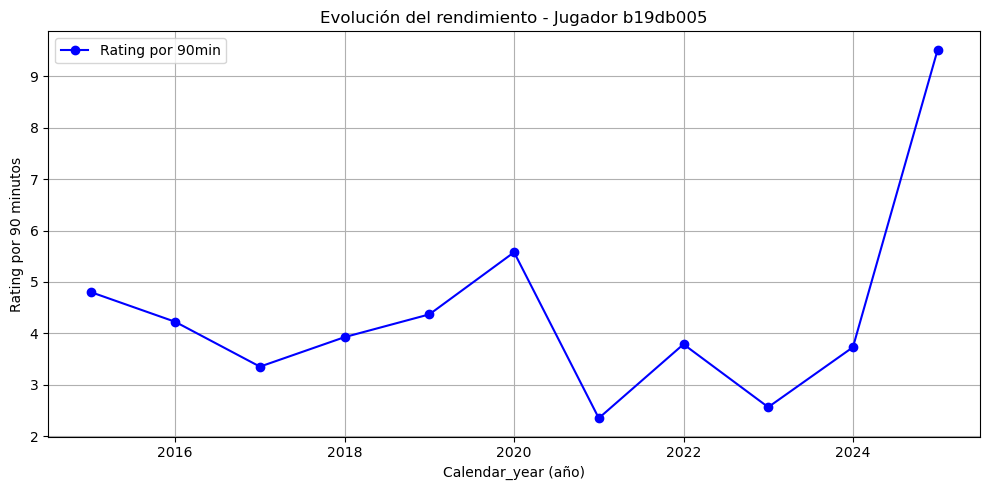

In [67]:
# ----------------------------------------------
# Etapa 3 (visual extra): Tabla y gráfica de evolución de un jugador: Ousmane Dembelé
# ----------------------------------------------

import matplotlib.pyplot as plt

# Seleccionamos directamente el jugador deseado
player_id = 'b19db005'

# Filtramos su información por temporada
player_data = df_season[df_season['Player_ID'] == player_id].sort_values('Calendar_year')

# Mostramos la tabla con su evolución
print(f"\n📊 Evolución por temporada del jugador {player_id}:")
print(player_data[['Calendar_year', 'Minutes', 'Goals', 'Assists', 'rating_per_90', 'Age']])

# Gráfica de evolución del rating
plt.figure(figsize=(10, 5))
plt.plot(player_data['Calendar_year'], player_data['rating_per_90'], marker='o', linestyle='-', color='blue', label='Rating por 90min')
plt.title(f"Evolución del rendimiento - Jugador {player_id}")
plt.xlabel("Calendar_year (año)")
plt.ylabel("Rating por 90 minutos")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In [68]:
# ----------------------------------------------
# Etapa 4: Detección del año pico y clasificación del tipo de carrera
# ----------------------------------------------

# 1. Detectamos el año con mayor rating por jugador
peak_info = (
    df_season.sort_values(['Player_ID', 'rating_per_90'], ascending=[True, False])
    .groupby('Player_ID')
    .first()
    .reset_index()
    .rename(columns={
        'Calendar_year': 'peak_year',
        'rating_per_90': 'peak_rating',
        'Age': 'age_at_peak'
    })
)

# 2. Unimos esta información al df_season (para cada fila anual del jugador)
df_season = df_season.merge(
    peak_info[['Player_ID', 'peak_year', 'peak_rating', 'age_at_peak']],
    on='Player_ID', how='left'
)

# 3. Clasificamos el tipo de carrera según la edad en el año del pico
def assign_peak_group(age):
    if age <= 23:
        return 'joven estrella'
    elif age <= 28:
        return 'jugador medio'
    else:
        return 'estrellato tardío'

df_season['peak_group'] = df_season['age_at_peak'].apply(assign_peak_group)

# 4. Verificación individual
print("\n📌 Ejemplo de jugadores con su año de pico y tipo de carrera:")
print(df_season[['Player_ID', 'Calendar_year', 'rating_per_90', 'peak_year', 'peak_rating', 'age_at_peak', 'peak_group']].head(10))

# 5. Resumen por grupo
print("\n📊 Distribución de tipos de carrera:")
print(df_season[['Player_ID', 'peak_group']].drop_duplicates()['peak_group'].value_counts())

# ----------------------------------------------
# ✅ Resultado esperado:
# - Cada jugador tiene su peak_year, peak_rating, y peak_group definidos
# - La información se mantiene en df_season, línea por año natural
# - Listo para generar curvas promedio por tipo de carrera (etapa 5)
# ----------------------------------------------



📌 Ejemplo de jugadores con su año de pico y tipo de carrera:
  Player_ID  Calendar_year  rating_per_90  peak_year  peak_rating  \
0  0118dd71           2015       0.000000       2023       0.0625   
1  0118dd71           2016      -0.333333       2023       0.0625   
2  0118dd71           2017      -0.071429       2023       0.0625   
3  0118dd71           2018       0.000000       2023       0.0625   
4  0118dd71           2019       0.000000       2023       0.0625   
5  0118dd71           2020      -0.100000       2023       0.0625   
6  0118dd71           2021       0.000000       2023       0.0625   
7  0118dd71           2022      -0.111111       2023       0.0625   
8  0118dd71           2023       0.062500       2023       0.0625   
9  0118dd71           2024       0.000000       2023       0.0625   

   age_at_peak         peak_group  
0    30.795893  estrellato tardío  
1    30.795893  estrellato tardío  
2    30.795893  estrellato tardío  
3    30.795893  estrellato tardío 


📊 Curvas promedio por grupo:
          peak_group  year_since_debut  rating_per_90
0  estrellato tardío                 1       0.880128
1  estrellato tardío                 2       1.315073
2  estrellato tardío                 3       1.614148
3  estrellato tardío                 4       1.914443
4  estrellato tardío                 5       2.238363
5  estrellato tardío                 6       2.569171
6  estrellato tardío                 7       2.401530
7  estrellato tardío                 8       2.444073
8  estrellato tardío                 9       2.635402
9  estrellato tardío                10       2.444543


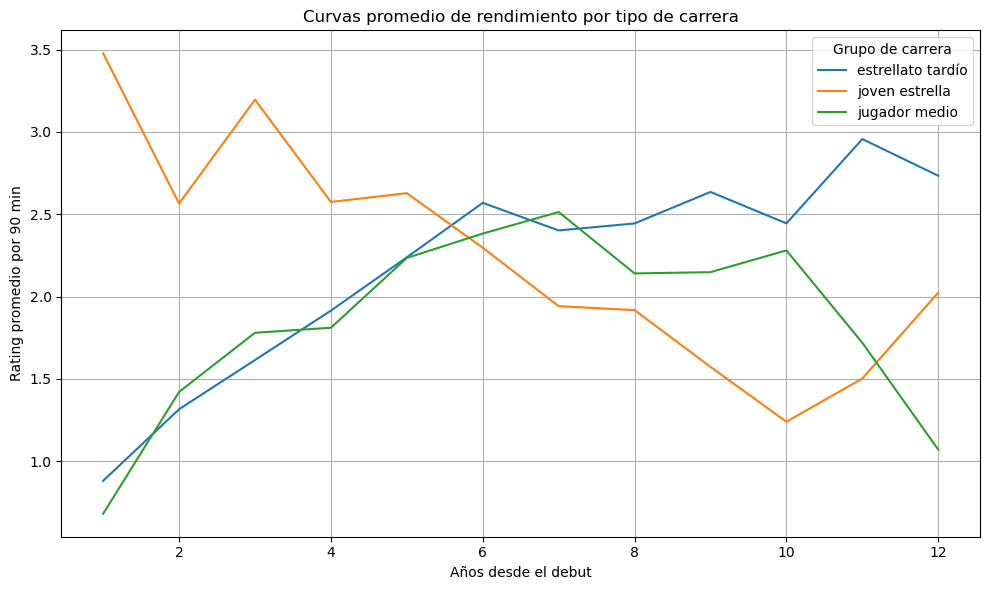

In [69]:
# ----------------------------------------------
# Etapa 5: Curvas promedio por tipo de carrera
# ----------------------------------------------

import matplotlib.pyplot as plt

# Asegúrate de que career_df y df_season están disponibles
# Aquí usamos 'career_df' porque contiene 'year_since_debut'
# Y unimos la info de 'peak_group' desde df_season

# ----------------------------------------------
# Recreamos career_df (trayectoria por año desde el debut)
# ----------------------------------------------

# Si no lo has calculado aún:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
debut_dates = df[df['Minutes'] > 0].groupby('Player_ID')['Date'].min()
df['debut_year'] = df['Player_ID'].map(debut_dates).dt.year
df['year_since_debut'] = df['Date'].dt.year - df['debut_year'] + 1
df['age'] = (df['Date'] - df['Birth_date']).dt.days / 365.25
df['age_year_1'] = df.groupby('Player_ID')['age'].transform('first')

# Ahora sí, agregamos por año relativo (trayectoria)
career_df = df.groupby(['Player_ID', 'year_since_debut']).agg({
    'Minutes': 'sum',
    'Goals': 'sum',
    'Assists': 'sum',
    'rating_per_90': 'mean',
    'age_year_1': 'first'
}).reset_index()

# Extraer solo una fila por jugador con su peak_group
peak_groups = df_season[['Player_ID', 'peak_group']].drop_duplicates()

# Unimos esto a career_df (por year_since_debut)
career_df = career_df.merge(peak_groups, on='Player_ID', how='left')

# Agrupamos por grupo y año desde el debut
curves = career_df.groupby(['peak_group', 'year_since_debut'])['rating_per_90'].mean().reset_index()

# Verificamos cuántos jugadores hay en cada curva
print("\n📊 Curvas promedio por grupo:")
print(curves.head(10))

# ----------------------------------------------
# Visualización
# ----------------------------------------------
plt.figure(figsize=(10, 6))

for group in curves['peak_group'].unique():
    group_data = curves[curves['peak_group'] == group]
    plt.plot(group_data['year_since_debut'], group_data['rating_per_90'], label=group)

plt.title("Curvas promedio de rendimiento por tipo de carrera")
plt.xlabel("Años desde el debut")
plt.ylabel("Rating promedio por 90 min")
plt.grid(True)
plt.legend(title="Grupo de carrera")
plt.tight_layout()
plt.show()


In [70]:
import joblib

# Guarda el dataframe de curvas promedio
joblib.dump(curves, 'model/curvas_promedio.joblib')


['model/curvas_promedio.joblib']

In [71]:
# ----------------------------------------------
# Etapa 6: Preparación del dataset de modelado (usando los primeros 3 años desde el debut)
# ----------------------------------------------

# 1. Tomamos solo los primeros 3 años de carrera
early_years = career_df[career_df['year_since_debut'] <= 3]

# 2. Pivotamos para convertir años en columnas (rating, edad y minutos)
pivot_rating = early_years.pivot(index='Player_ID', columns='year_since_debut', values='rating_per_90')
pivot_age = early_years.pivot(index='Player_ID', columns='year_since_debut', values='age_year_1')
pivot_minutes = early_years.pivot(index='Player_ID', columns='year_since_debut', values='Minutes')

# 3. Renombramos las columnas para claridad
pivot_rating.columns = [f'rating_year_{i}' for i in pivot_rating.columns]
pivot_age.columns = [f'age_year_{i}' for i in pivot_age.columns]
pivot_minutes.columns = [f'minutes_year_{i}' for i in pivot_minutes.columns]

# 4. Combinamos todo en un solo DataFrame
df_model = pd.concat([pivot_rating, pivot_age, pivot_minutes], axis=1)

# 5. Calculamos variables derivadas (solo con años disponibles)
if 'rating_year_2' in df_model.columns and 'rating_year_1' in df_model.columns:
    df_model['growth_2_1'] = df_model['rating_year_2'] - df_model['rating_year_1']
if 'rating_year_3' in df_model.columns and 'rating_year_2' in df_model.columns:
    df_model['growth_3_2'] = df_model['rating_year_3'] - df_model['rating_year_2']

# Media y suma de minutos
df_model['avg_rating'] = df_model[[col for col in df_model.columns if 'rating_year_' in col]].mean(axis=1)
df_model['sum_minutes'] = df_model[[col for col in df_model.columns if 'minutes_year_' in col]].sum(axis=1)

# Tendencias si año 1 y 3 existen
if 'rating_year_3' in df_model.columns and 'rating_year_1' in df_model.columns:
    df_model['rating_trend'] = df_model['rating_year_3'] - df_model['rating_year_1']
if 'minutes_year_3' in df_model.columns and 'minutes_year_1' in df_model.columns:
    df_model['minutes_trend'] = df_model['minutes_year_3'] - df_model['minutes_year_1']

# 6. Añadimos la variable objetivo (peak_group)
df_model = df_model.merge(
    df_season[['Player_ID', 'peak_group']].drop_duplicates(),
    on='Player_ID',
    how='inner'
)

# 7. Eliminamos jugadores sin al menos 1 año de rating
rating_cols = [col for col in df_model.columns if 'rating_year_' in col]
valid_seasons = df_model[rating_cols].notna().sum(axis=1)
df_model = df_model[valid_seasons >= 1].copy()

# 8. Rellenamos nulos restantes con 0 (seguro para RandomForest, XGBoost...)
df_model.fillna(0, inplace=True)

# 9. Verificamos resultado final
print("\n📦 Dataset de modelado final:")
print(df_model.head())

print("\n🎯 Distribución del target (peak_group):")
print(df_model['peak_group'].value_counts())




📦 Dataset de modelado final:
  Player_ID  rating_year_1  rating_year_2  rating_year_3  age_year_1  \
0  0118dd71       0.000000      -0.333333      -0.071429   24.049281   
1  016f3eac      90.000000       0.257174       1.872375   21.793292   
2  01d00f38       0.300000       0.000000       0.357143   28.197125   
3  01eb744d       1.097561       5.461892       3.637396   28.432580   
4  02319ad7       0.655172       1.669849       1.017538   25.831622   

   age_year_2  age_year_3  minutes_year_1  minutes_year_2  minutes_year_3  \
0   24.049281   24.049281           900.0           270.0          1260.0   
1   21.793292   21.793292           162.0          2873.0          1817.0   
2    0.000000   28.197125            30.0             0.0          1011.0   
3   28.432580   28.432580           286.0           827.0          1770.0   
4   25.831622   25.831622          1142.0          2972.0          2343.0   

   growth_2_1  growth_3_2  avg_rating  sum_minutes  rating_trend  \
0   -0

In [72]:
# ----------------------------------------------
# Etapa 7: División del dataset y codificación del target
# ----------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Reestablecemos el índice
df_model = df_model.reset_index(drop=True)

# Codificamos el target
le = LabelEncoder()
df_model['peak_group_encoded'] = le.fit_transform(df_model['peak_group'])

# 1. Lista de jugadores únicos
player_ids = df_model['Player_ID'].unique()

# 2. División por jugador (stratificada por su clase)
player_targets = df_model.drop_duplicates('Player_ID')[['Player_ID', 'peak_group_encoded']]
train_ids, test_ids = train_test_split(
    player_targets['Player_ID'],
    test_size=0.2,
    stratify=player_targets['peak_group_encoded'],
    random_state=42
)

# 3. Creamos los conjuntos finales
train_df = df_model[df_model['Player_ID'].isin(train_ids)].copy()
test_df = df_model[df_model['Player_ID'].isin(test_ids)].copy()

X_train = train_df.drop(columns=['peak_group', 'peak_group_encoded', 'Player_ID'])
y_train = train_df['peak_group_encoded']

X_test = test_df.drop(columns=['peak_group', 'peak_group_encoded', 'Player_ID'])
y_test = test_df['peak_group_encoded']

# Verificación
print(f"✅ Train jugadores únicos: {train_df['Player_ID'].nunique()} | Total muestras: {X_train.shape[0]}")
print(f"✅ Test  jugadores únicos: {test_df['Player_ID'].nunique()} | Total muestras: {X_test.shape[0]}")
print(f"🎯 Clases codificadas: {le.classes_}")



✅ Train jugadores únicos: 572 | Total muestras: 572
✅ Test  jugadores únicos: 143 | Total muestras: 143
🎯 Clases codificadas: ['estrellato tardío' 'joven estrella' 'jugador medio']


In [73]:
# ----------------------------------------------
# Etapa 8: Entrenamiento y evaluación de modelos
# ----------------------------------------------

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    cohen_kappa_score,
    matthews_corrcoef
)

# Diccionario de modelos
models = {
    'RandomForest': RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42),
    'XGBoost': XGBClassifier(
        objective='multi:softmax',
        eval_metric='mlogloss',
        num_class=3,
        learning_rate=0.05,
        max_depth=6,
        n_estimators=300,
        subsample=0.8,
        colsample_bytree=0.8,
        use_label_encoder=False,
        random_state=42
    ),
    'LightGBM': LGBMClassifier(
        objective='multiclass',
        num_class=3,
        learning_rate=0.05,
        n_estimators=300,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
}

# Entrenamiento y evaluación
for name, model in models.items():
    print(f"\n🔧 Entrenando {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n📊 Resultados para {name}:")
    print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print("\n📄 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print("📉 Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))
    print(f"🧠 Kappa Score: {cohen_kappa_score(y_test, y_pred):.3f}")
    print(f"📈 MCC: {matthews_corrcoef(y_test, y_pred):.3f}")



🔧 Entrenando RandomForest...

📊 Resultados para RandomForest:
✅ Accuracy: 0.622

📄 Classification Report:
                   precision    recall  f1-score   support

estrellato tardío       0.62      0.48      0.54        42
   joven estrella       0.83      0.50      0.62        40
    jugador medio       0.56      0.80      0.66        61

         accuracy                           0.62       143
        macro avg       0.67      0.59      0.61       143
     weighted avg       0.66      0.62      0.62       143

📉 Matriz de Confusión:
[[20  1 21]
 [ 3 20 17]
 [ 9  3 49]]
🧠 Kappa Score: 0.399
📈 MCC: 0.417

🔧 Entrenando XGBoost...


c:\Users\juanm\miniconda3\envs\futpeak\lib\site-packages\xgboost\training.py:183: UserWarning: [19:31:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📊 Resultados para XGBoost:
✅ Accuracy: 0.545

📄 Classification Report:
                   precision    recall  f1-score   support

estrellato tardío       0.49      0.50      0.49        42
   joven estrella       0.68      0.53      0.59        40
    jugador medio       0.52      0.59      0.55        61

         accuracy                           0.55       143
        macro avg       0.56      0.54      0.55       143
     weighted avg       0.56      0.55      0.55       143

📉 Matriz de Confusión:
[[21  2 19]
 [ 5 21 14]
 [17  8 36]]
🧠 Kappa Score: 0.296
📈 MCC: 0.297

🔧 Entrenando LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2455
[LightGBM] [Info] Number of data points in the train set: 572, number of used features: 15
[LightGBM] [Info] Start training from score -1.219240
[LightGBM] [Info] Start training from score -1.2865

In [75]:
import joblib
import os

# Crear carpeta si no existe
os.makedirs("model", exist_ok=True)

# 1. Guardar modelo
joblib.dump(model, 'model/futpeak_model_multi.joblib')

# 2. Guardar label encoder
joblib.dump(le, 'model/label_encoder.joblib')

# 3. Guardar curvas promedio
# Reconstruir año de debut si hace falta
debut_years = df_season.groupby('Player_ID')['Calendar_year'].min()
df_season['year_since_debut'] = df_season['Calendar_year'] - df_season['Player_ID'].map(debut_years) + 1

# Ahora agrupamos con year_since_debut
df_curves = df_season.groupby(['peak_group', 'year_since_debut'])['rating_per_90'].mean().reset_index()
df_curves.rename(columns={'rating_per_90': 'rating_avg'}, inplace=True)
joblib.dump(df_curves, 'model/curvas_promedio.joblib')


# 4. Guardar columnas del modelo
joblib.dump(X_train.columns.tolist(), 'model/model_features.joblib')

print("✅ Todos los objetos guardados correctamente.")



✅ Todos los objetos guardados correctamente.


In [ ]:
# ----------------------------------------------
# Etapa 9: Limpieza de outliers extremos
# ----------------------------------------------

# 1. Clip a valores razonables de rating por 90min
# Por ejemplo, de 0 a 10 (estándar de escala futbolística)
rating_cols = [col for col in df_model.columns if 'rating_year_' in col or 'avg_rating' in col]

for col in rating_cols:
    df_model[col] = df_model[col].clip(lower=0, upper=10)

# 2. Recalcular variables derivadas (por si se ven afectadas)
df_model['growth_2_1'] = df_model['rating_year_2'] - df_model['rating_year_1']
df_model['growth_3_2'] = df_model['rating_year_3'] - df_model['rating_year_2']


# 3. Verificamos que ya no hay valores absurdos
print("\n📊 Verificación de límites tras limpieza:")
print(df_model[rating_cols].describe())



📊 Verificación de límites tras limpieza:
       rating_year_1  rating_year_2  rating_year_3  avg_rating
count     715.000000     715.000000     715.000000  715.000000
mean        1.433059       1.490311       1.664027    1.712566
std         2.219480       1.891313       1.867509    1.817332
min         0.000000       0.000000       0.000000    0.000000
25%         0.000000       0.000000       0.000000    0.425143
50%         0.444444       0.888889       1.254287    1.319853
75%         2.018556       2.337779       2.472466    2.336036
max        10.000000      10.000000      10.000000   10.000000


In [ ]:
# ----------------------------------------------
# Etapa 10: Optimización de RandomForest con RandomizedSearchCV
# ----------------------------------------------

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np

# 1. Espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# 2. Inicializamos el modelo base
rf = RandomForestClassifier(random_state=42)

# 3. RandomizedSearchCV
rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,  # número de combinaciones a probar
    cv=3,       # validación cruzada
    verbose=1,
    n_jobs=-1,  # usa todos los núcleos disponibles
    random_state=42
)

# 4. Entrenamos
rf_search.fit(X_train, y_train)

# 5. Evaluamos
best_rf = rf_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\n✅ Mejor combinación de hiperparámetros encontrada:")
print(rf_search.best_params_)

print("\n📊 Resultados tras tuning:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("📉 Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print(f"🧠 Kappa: {cohen_kappa_score(y_test, y_pred):.3f}")
print(f"📈 MCC: {matthews_corrcoef(y_test, y_pred):.3f}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\juanm\miniconda3\envs\futpeak\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
96 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
51 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\juanm\miniconda3\envs\futpeak\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\juanm\miniconda3\envs\futpeak\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\juanm\miniconda3\envs\futpeak\lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constra


✅ Mejor combinación de hiperparámetros encontrada:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 7, 'bootstrap': True}

📊 Resultados tras tuning:
Accuracy: 0.629

📄 Classification Report:
                   precision    recall  f1-score   support

estrellato tardío       0.65      0.48      0.55        42
   joven estrella       0.83      0.50      0.62        40
    jugador medio       0.57      0.82      0.67        61

         accuracy                           0.63       143
        macro avg       0.68      0.60      0.61       143
     weighted avg       0.66      0.63      0.62       143

📉 Matriz de Confusión:
[[20  1 21]
 [ 3 20 17]
 [ 8  3 50]]
🧠 Kappa: 0.409
📈 MCC: 0.429


In [ ]:
# ----------------------------------------------
# Etapa 11: Optimización con GridSearchCV
# ----------------------------------------------

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, cohen_kappa_score, matthews_corrcoef
)

# 1. Definimos un grid de hiperparámetros válidos y sensatos
param_grid = {
    'n_estimators': [200, 400],
    'max_depth': [6, 10],
    'min_samples_split': [5, 10],
    'max_features': ['sqrt', 'log2']
}

# 2. Inicializamos el modelo base
rf = RandomForestClassifier(random_state=42)

# 3. GridSearchCV con validación cruzada
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1
)

# 4. Entrenamiento
grid_search.fit(X_train, y_train)

# 5. Evaluación del mejor modelo
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# 6. Resultados
print("\n✅ Mejor combinación encontrada:")
print(grid_search.best_params_)

print("\n📊 Resultados del modelo optimizado:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("📉 Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print(f"🧠 Kappa: {cohen_kappa_score(y_test, y_pred):.3f}")
print(f"📈 MCC: {matthews_corrcoef(y_test, y_pred):.3f}")


Fitting 3 folds for each of 16 candidates, totalling 48 fits

✅ Mejor combinación encontrada:
{'max_depth': 6, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 400}

📊 Resultados del modelo optimizado:
Accuracy: 0.615

📄 Classification Report:
                   precision    recall  f1-score   support

estrellato tardío       0.59      0.48      0.53        42
   joven estrella       0.87      0.50      0.63        40
    jugador medio       0.56      0.79      0.65        61

         accuracy                           0.62       143
        macro avg       0.67      0.59      0.60       143
     weighted avg       0.65      0.62      0.61       143

📉 Matriz de Confusión:
[[20  1 21]
 [ 3 20 17]
 [11  2 48]]
🧠 Kappa: 0.388
📈 MCC: 0.405


# Sugerencias Julio

* Meter medias e intervalos de confianza en gráfica

* Usar los dos modelos

* Tener todo en una página de streamlit

* Feedback

* Formulario de google no más de 10 preguntas (opciones y caja de comentarios)

* ¿Cómo vender? Idea de negocio, corto, medio y largo plazo

* Vídeo presentación para ir enseñando a gente de Evolve y empresas.